KNN Algorithm
Dataset : Zoo(csv file)
Problem: Implement a KNN model to classify the animals in to categorie# 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


In [2]:
ZOO = pd.read_csv("C:/Users/Prashant/Downloads/Zoo (1).csv")


In [3]:
ZOO.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
ZOO.shape

(101, 18)

In [7]:
ZOO.columns


Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [8]:
ZOO.nunique()

animal name    100
hair             2
feathers         2
eggs             2
milk             2
airborne         2
aquatic          2
predator         2
toothed          2
backbone         2
breathes         2
venomous         2
fins             2
legs             6
tail             2
domestic         2
catsize          2
type             7
dtype: int64

In [9]:
ZOO['catsize'].unique()

array([1, 0], dtype=int64)

In [10]:
ZOO['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

<AxesSubplot:>

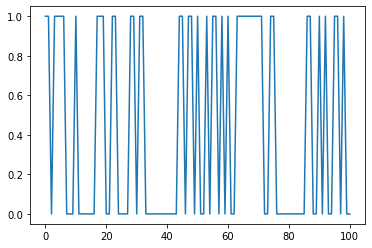

In [12]:
ZOO.catsize.plot()

<AxesSubplot:>

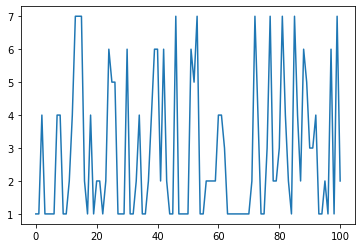

In [13]:
ZOO.type.plot()

In [14]:
ZOO.isnull().sum()


animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

array([[<AxesSubplot:title={'center':'hair'}>,
        <AxesSubplot:title={'center':'feathers'}>,
        <AxesSubplot:title={'center':'eggs'}>,
        <AxesSubplot:title={'center':'milk'}>],
       [<AxesSubplot:title={'center':'airborne'}>,
        <AxesSubplot:title={'center':'aquatic'}>,
        <AxesSubplot:title={'center':'predator'}>,
        <AxesSubplot:title={'center':'toothed'}>],
       [<AxesSubplot:title={'center':'backbone'}>,
        <AxesSubplot:title={'center':'breathes'}>,
        <AxesSubplot:title={'center':'venomous'}>,
        <AxesSubplot:title={'center':'fins'}>],
       [<AxesSubplot:title={'center':'legs'}>,
        <AxesSubplot:title={'center':'tail'}>,
        <AxesSubplot:title={'center':'domestic'}>,
        <AxesSubplot:title={'center':'catsize'}>],
       [<AxesSubplot:title={'center':'type'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

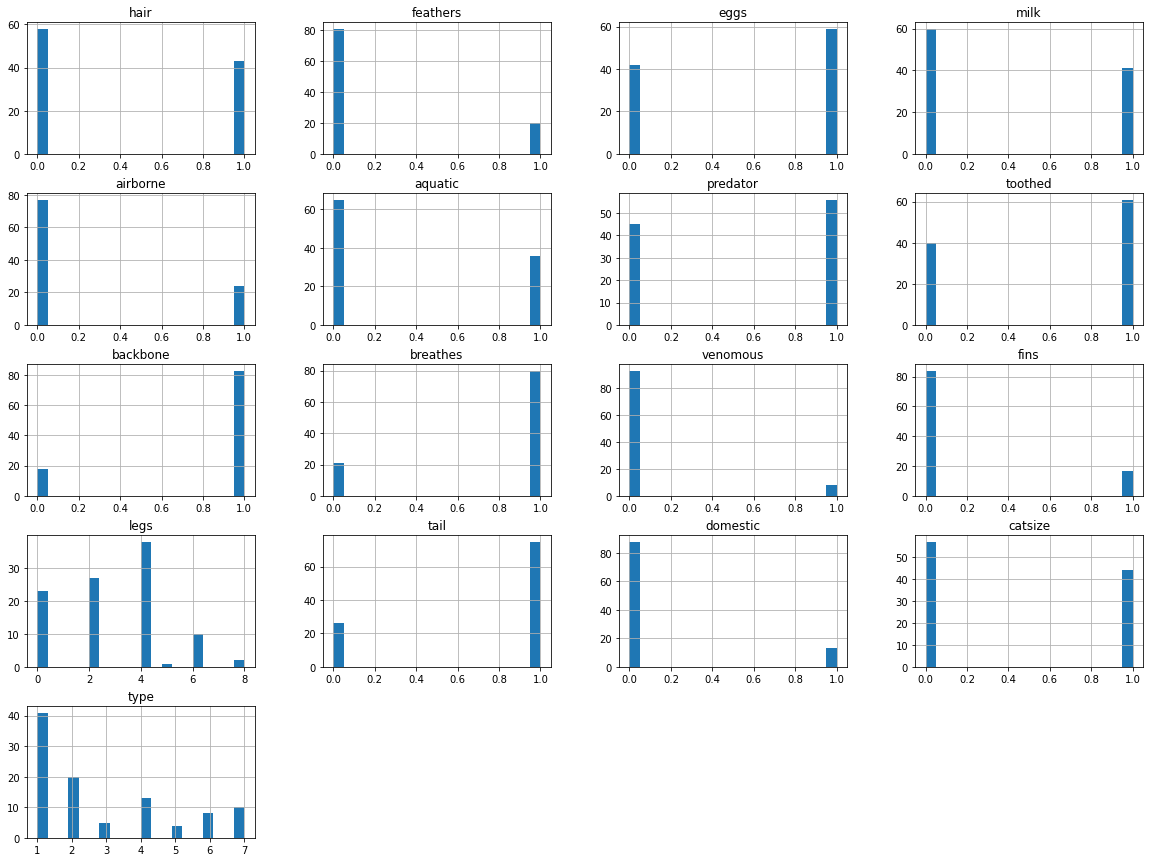

In [15]:
ZOO.hist(bins=20, figsize=(20,15))

# Segregating variables: Independent and Dependent Variables

In [17]:
#seperating independent and dependent variables
x = ZOO.drop(['type'], axis=1)
y = ZOO['type']
x.shape, y.shape

((101, 17), (101,))

In [18]:
x.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [19]:
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [20]:
X = ZOO.iloc[:, 1:16]
Y =ZOO.iloc[:, 17]

In [21]:
num_folds = 10
kfold = KFold(n_splits=10)

In [22]:
model = KNeighborsClassifier(n_neighbors=17)
results = cross_val_score(model, X, Y, cv=kfold)



In [23]:
print(results.mean())


0.78


# Grid Search for Algorithm Tuning


In [24]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [25]:
data = read_csv("C:/Users/Prashant/Downloads/Zoo (1).csv")

X = data.iloc[:, 1:16]
Y =data.iloc[:, 17]

In [26]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [27]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [28]:
print(grid.best_score_)
print(grid.best_params_)

0.96
{'n_neighbors': 1}


# Visualizing the CV results

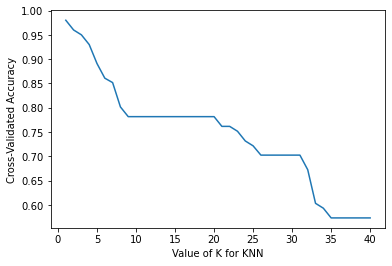

In [29]:
import matplotlib.pyplot as plt 
%matplotlib inline

k_range = range(1, 41)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [30]:
X = ZOO.iloc[:,1:17]

In [31]:
X=pd.get_dummies(X)

In [32]:
X=X.values

In [33]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [34]:
Y = ZOO.iloc[:,-1].values

In [35]:
Y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

# Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size =.25, random_state = 42)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
KNN = KNeighborsClassifier(n_neighbors=5,
    weights='uniform',
    algorithm='kd_tree',
    leaf_size=30,
    p=2,
    metric='minkowski',
    n_jobs=None)

In [40]:
KNN.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='kd_tree')

In [41]:
Y_pred=KNN.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
print(classification_report(Y_test.reshape(-1,1), Y_pred))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         2
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         2

    accuracy                           0.88        26
   macro avg       0.79      0.77      0.76        26
weighted avg       0.92      0.88      0.89        26



In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
print('Cross Val',cross_val_score(KNN, Y_test.reshape(-1,1),Y_pred))

Cross Val [0.5 0.8 0.8 0.8 0.6]


In [46]:
print('Cross Val',np.mean(cross_val_score(KNN, Y_test.reshape(-1,1),Y_pred)))

Cross Val 0.7000000000000001
